Total Confirmed Cases:
 Country
Italy       3500
USA          230
Pakistan       8
Name: Confirmed, dtype: int64


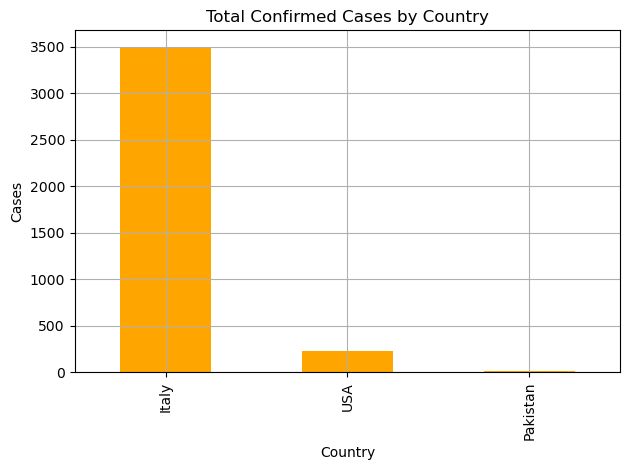

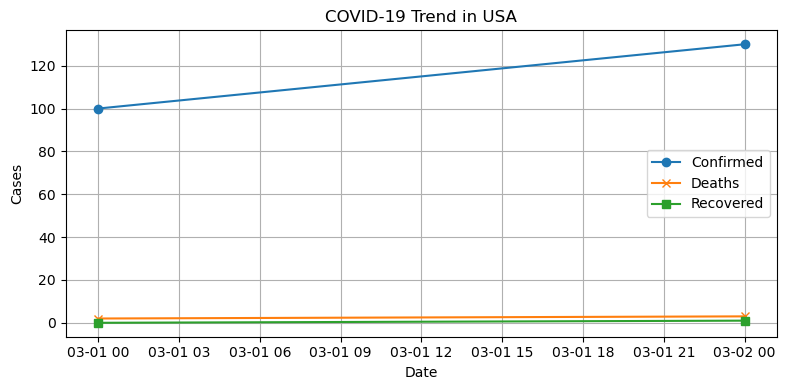

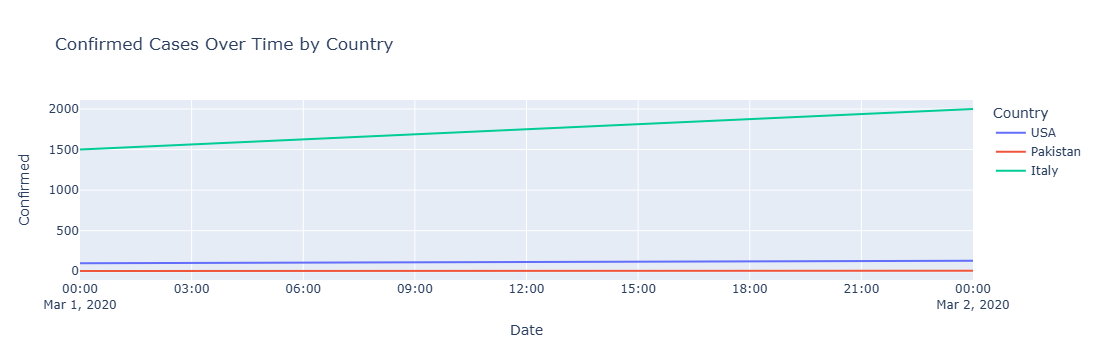

In [2]:
# Step 1: Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Step 2: Create sample COVID data
data = {
    'Date': ['2020-03-01', '2020-03-01', '2020-03-01', '2020-03-02', '2020-03-02', '2020-03-02'],
    'Country': ['USA', 'Pakistan', 'Italy', 'USA', 'Pakistan', 'Italy'],
    'Confirmed': [100, 3, 1500, 130, 5, 2000],
    'Deaths': [2, 0, 34, 3, 0, 52],
    'Recovered': [0, 0, 83, 1, 1, 120]
}

# Step 3: Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv('covid_data.csv', index=False)

# Step 4: Load the data
df = pd.read_csv('covid_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Total Confirmed Cases by Country
total_confirmed = df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)
print("Total Confirmed Cases:\n", total_confirmed)

# Step 6: Plot total confirmed cases by country
total_confirmed.plot(kind='bar', color='orange', title='Total Confirmed Cases by Country')
plt.ylabel('Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Trend over time (USA example)
usa_data = df[df['Country'] == 'USA']

plt.figure(figsize=(8,4))
plt.plot(usa_data['Date'], usa_data['Confirmed'], marker='o', label='Confirmed')
plt.plot(usa_data['Date'], usa_data['Deaths'], marker='x', label='Deaths')
plt.plot(usa_data['Date'], usa_data['Recovered'], marker='s', label='Recovered')
plt.title('COVID-19 Trend in USA')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Interactive Chart (Optional, for browser)
fig = px.line(df, x="Date", y="Confirmed", color='Country', title="Confirmed Cases Over Time by Country")
fig.show()
